#### implementation of unsupervised algorithm: Hierarchical_Means clustering algorithm
Here I am going to apply Hierarchical_Means algorithm and going to evaluate the model with the help of silhoutte method

In [1]:
#loading all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
import scipy.cluster.hierarchy as sch
from pandas_profiling import ProfileReport
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

#### loading the dataset from kaggle

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Hierarchical_Means clustering algorithm: 
this involves considering every single point as a cluster and then combining nearby cluster to make a bigger cluster until we get to one last cluster. We can use Dendogram to combine the clusters 

In [16]:
# going to take only two features for understanding and visualization
X=df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### creating a dendogram: 
it is a bottom-top approach where we calculate the distance between points
and start combining the nearest point to form the clusters.

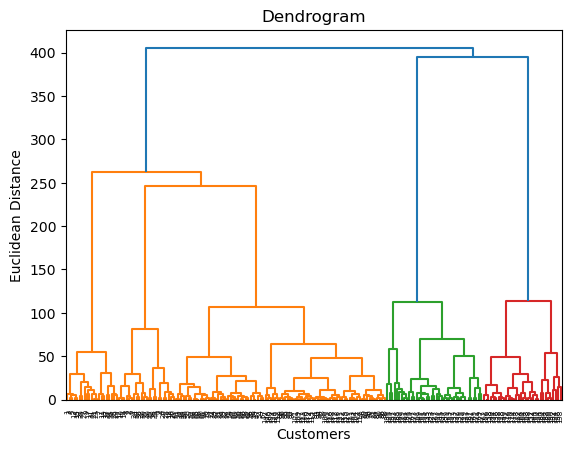

In [17]:
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

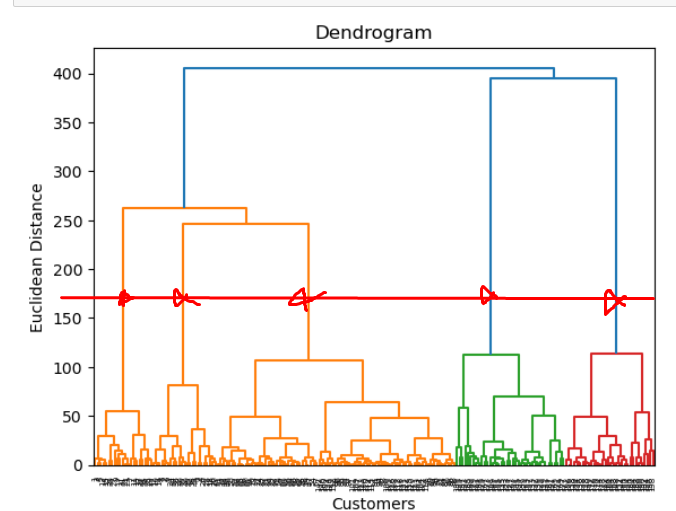


####  here K=5. How? 
as the longest line where no horizontal line passes through it has 5 intersection points upon drawing a horizontal line through it.
after finding the optimal value of K, we can apply the heirarchical clustering 

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
H_clustering=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_predict=H_clustering.fit_predict(X)


In [20]:
y_predict

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

#### we don't have centroids  in this clustering so the clusters will look like below:

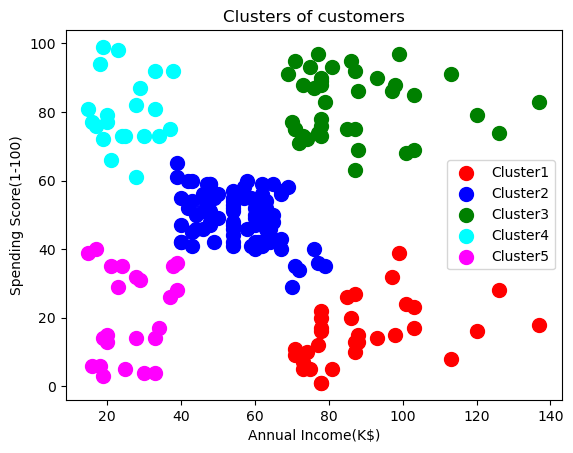

In [21]:
plt.scatter(X[y_predict==0,0],X[y_predict==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_predict==1,0],X[y_predict==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_predict==2,0],X[y_predict==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_predict==3,0],X[y_predict==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_predict==4,0],X[y_predict==4,1],s=100,c='magenta',label='Cluster5')


plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

#### Outcome:
Heirarchical Clustering is time consuming when it comes to creating
dandrogram for just 200 records therefore it is not suggested to use it for large dataset
it can be used for small dataset. for large datasets, K-means can be used.

#### Validating the model: Silhoutte method:
as we know the silhoutte value varies between -1 and + 1. the more the value is towards
+1 the better the cluster configuration is and the more the value is towards
-1 the worst the cluster configuration meaning either there are too many clusters
or too few clusters


In [28]:
sil_score=[]
for i in range(2,10):
    H_clustering=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    cluster_labels=H_clustering.fit_predict(X)
    sil_avg=silhouette_score(X,cluster_labels)
    sil_score.append(sil_avg)

In [29]:
sil_score

[0.36706444723912895,
 0.4618340266628975,
 0.4916598193892782,
 0.5529945955148897,
 0.5380208285578872,
 0.519904611908887,
 0.4326286245782246,
 0.43892545672004507]

#### the above scoring confirms that k=5 is the best value for K